In [1]:
!nvidia-smi

Mon Feb 16 20:36:30 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:07:00.0 Off |                    0 |
| N/A   29C    P0             64W /  400W |       1MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [19]:
import os
import random
from pathlib import Path

import keypoint_moseq as kpms
os.getcwd()

'/projects/kumar-lab/miaod/projects/unsupervised-aging'

In [3]:

import sys
sys.path.insert(0, str(Path(os.environ["UNSUPERVISED_AGING"]) / "src/kpms_utils"))
from src.methods import load_and_format_data, generate_plots_and_movies

In [8]:
project_name  = "2025-07-03_kpms-v2"
model_name    = "2025-07-07_model-2"
kpms_dir      = Path(os.environ["UNSUPERVISED_AGING"]) / "data/kpms_projects"
poses_csv_dir = Path(os.environ["UNSUPERVISED_AGING"]) / "data/datasets/nature-aging_634/poses_csv"

project_dir = kpms_dir / project_name
assert kpms_dir.is_dir() and poses_csv_dir.is_dir()
assert (project_dir / model_name / "results.h5").is_file()

In [9]:
results = kpms.load_results(project_dir, model_name)

In [10]:
results

{'LL1-B2B__2019-09-04_SPD__LL1-1_AgedB6-0396.csv': {'centroid': array([[ 1.89143166e-01, -4.88779169e-02],
         [ 1.20997368e-01,  3.76833199e-01],
         [-1.32529547e+00,  1.55310141e-01],
         ...,
         [ 1.90022117e+02,  3.84535088e+02],
         [ 1.90578674e+02,  3.85091295e+02],
         [ 1.89946154e+02,  3.85275115e+02]]),
  'heading': array([ 0.31219965, -2.04673129,  1.82810644, ...,  0.99628609,
          1.0416428 ,  1.00006117]),
  'latent_state': array([[-0.31721286,  1.56446575, -1.5974736 ,  2.71561294],
         [-0.63618311,  2.30192183,  4.14429805, -0.79637131],
         [-0.03025751,  4.10351655,  4.48077375,  2.23272763],
         ...,
         [-0.26730215, -1.13969141, -1.02117451, -0.1047123 ],
         [-0.0854355 , -1.21143408, -0.95711163, -0.18459505],
         [-0.02955698, -1.18956036, -0.49390361, -0.40201871]]),
  'syllable': array([78, 78, 78, ...,  1,  1,  1])},
 'LL1-B2B__2019-09-04_SPD__LL1-2_AgedB6-0394.csv': {'centroid': array([[  0

In [11]:
config_fn = lambda: kpms.load_config(project_dir)
_, _, coordinates = load_and_format_data(poses_csv_dir, project_dir)
coordinates = {k: v[..., ::-1] for k, v in coordinates.items()}

Loading keypoint files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 634/634 [08:19<00:00,  1.27it/s]


In [12]:
coordinates

{'LL6-B2B__2020-06-26_SPD__AgedB6-1273.csv': array([[[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],
 
        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],
 
        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],
 
        ...,
 
        [[ 82., 431.],
         [ 89., 421.],
         [ 74., 425.],
         ...,
         [ 65., 398.],
         [ 59., 425.],
         [ 51., 437.]],
 
        [[ 83., 431.],
         [ 89., 421.],
         [ 74., 425.],
         ...,
         [ 65., 395.],
         [ 59., 425.],
         [ 51., 437.]],
 
        [[ 83., 431.],
         [ 89., 421.],
         [ 74., 425.],
         ...,
         [ 65., 395.],
         [ 59., 425.],
         [ 51., 437.]]]),
 'LL2-B2B__

In [29]:
coordinates_sleap = kpms.io.load_keypoints(poses_csv_dir.parent / "/poses", "deeplabcut")

TypeError: expected string or bytes-like object

In [14]:
len(results)

636

In [15]:
len(coordinates)

634

In [25]:
common_keys = results.keys() & coordinates.keys()
common_keys = random.sample(tuple(common_keys), 10)
print(len(common_keys))
results_merged = {k: results[k] for k in common_keys}
coordinates_merged = {k: coordinates[k] for k in common_keys}

10


Saving trajectory plots to /projects/kumar-lab/miaod/projects/unsupervised-aging/data/kpms_projects/2025-07-03_kpms-v2/2025-07-07_model-2/trajectory_plots


Generating trajectory plots: 100%|██████| 60/60 [00:29<00:00,  2.07it/s]


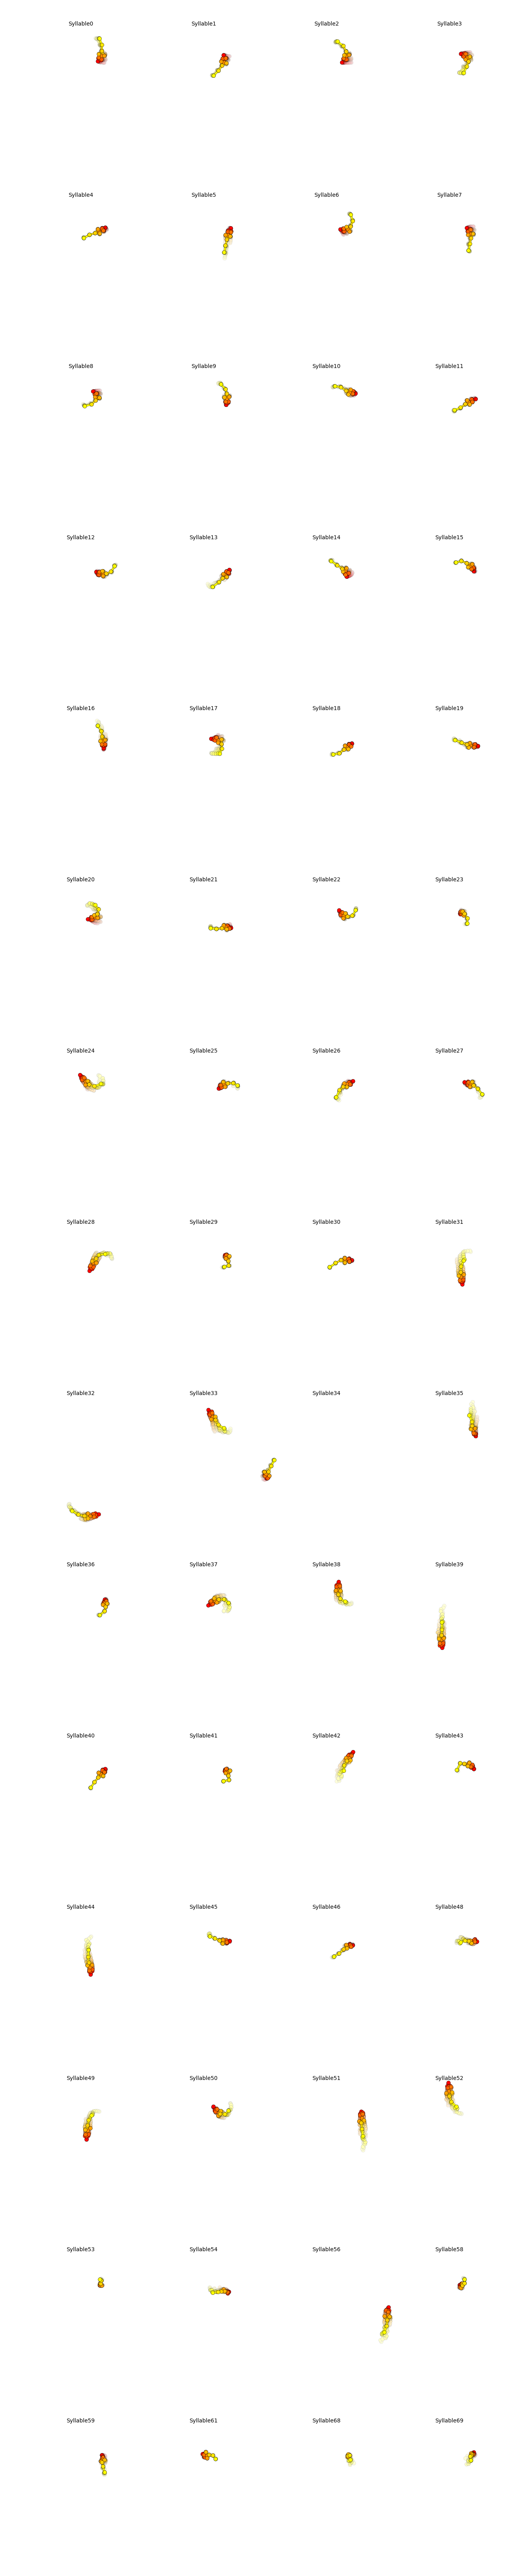

In [26]:
assert len(results_merged) == len(coordinates_merged)
_tmp = config_fn()
_tmp["video_dir"] = poses_csv_dir / "../videos"
kpms.generate_trajectory_plots(coordinates_merged, results_merged, project_dir, model_name, **_tmp)